# Minería de Datos - AstronomIA

Realizado por: Iván Tang Zhu

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, RandomForest, XGBoost y Bagging (Knn)
4. Evaluación del Modelo: matriz de confusion, Precision, Recall, Area ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_excel("datos_preparados.xlsx")
data.head()

,Unnamed: 0,u,g,r,i,z,class,redshift
0,0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [ ]:
#Conocemos los datos
data.info()

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Corrección de variables categóricas
data['class']=data['class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   u         80846 non-null  float64 
 1   g         80846 non-null  float64 
 2   r         80846 non-null  float64 
 3   i         80846 non-null  float64 
 4   z         80846 non-null  float64 
 5   class     80846 non-null  category
 6   redshift  80846 non-null  float64 
dtypes: category(1), float64(6)
memory usage: 3.8 MB


In [ ]:
#Descripción de variables numéricas
data.describe()

,u,g,r,i,z,redshift
count,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000
mean,22.161349,20.704360,19.703051,19.128452,18.806497,0.584377
std,2.265937,2.047053,1.855143,1.751144,1.757559,0.739235
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.425982,19.080290,18.250495,17.835680,17.561720,0.056781
50%,22.303210,21.195375,20.194430,19.449885,19.041040,0.442380
75%,23.789323,22.180855,21.086710,20.426460,19.928162,0.705790
max,32.781390,30.607000,29.571860,30.250090,29.383740,7.011245


<Axes: >

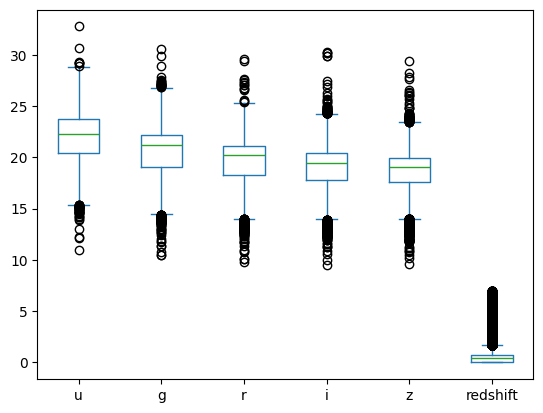

In [ ]:
#Descripción variables numéricas
data.plot(kind='box')

<Axes: xlabel='class'>

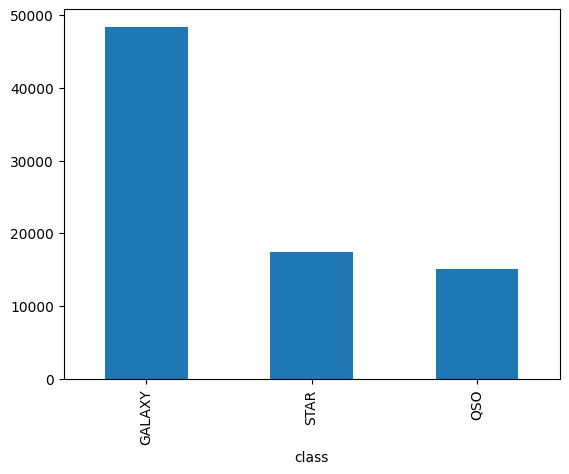

In [ ]:
#Descripción variables categóricas
data['class'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

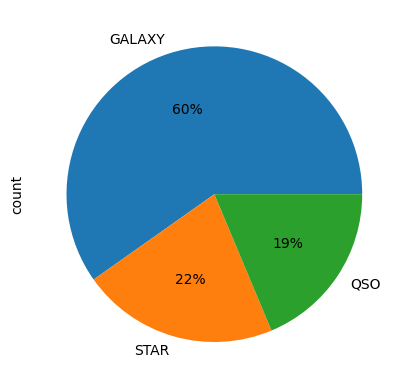

In [ ]:
data['class'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [ ]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
# No hay necesidad de hacer dummies

##Codificar variable objetivo

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Se codifican las categorias de la VARIABLE OBJETIVO

labelencoder = LabelEncoder()
data["class"]=labelencoder.fit_transform(data["class"]) #Objetivo

data.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


# 2. División 70-30


In [ ]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='class'>

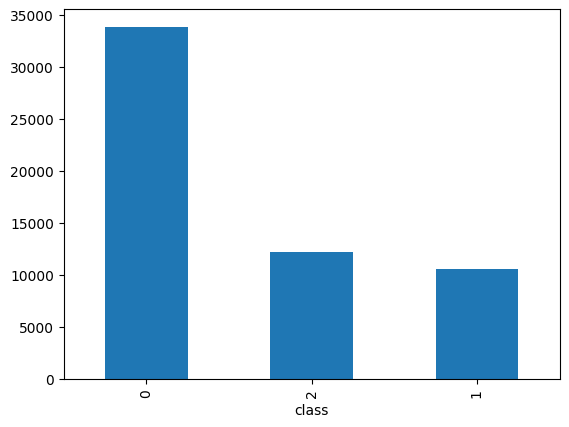

In [ ]:
#División 70-30
X = data.drop("class", axis = 1) # Variables predictoras
Y = data['class'] #Variable objetivo
# Se pone estratificado en Clasificación. En regresión no
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

#3. Balanceo del 70% de los datos

In [ ]:
Y_train.value_counts()

,count
class,
0,33839
2,12179
1,10574


In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

# Clase mayoritaria y tamaño
# conteos = data['class'].value_counts()
# clase_mayor = conteos.idxmax()
# tam_mayor = conteos.max()

# balanceo_1 = int(tam_mayor * 0.25)

# # Para multiclase hay que indicar cuanto se balancea
# sampling_strategy = {
#     1: balanceo_1,
#     2: balanceo_1
# }

# sm = SMOTE(k_neighbors=2, sampling_strategy=sampling_strategy) #se indican las variables predictoras categoricas
# X_train, Y_train = sm.fit_resample(X_train,Y_train) #X= variables predictoras Y=variable objetivo

#Validación Cruzada

In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()

#Medidas de evaluación
scoring=('f1_macro', 'accuracy','precision_macro', 'recall_macro')

#Muestreo lineal
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#3. Aprendizaje con el 70% y Evaluación con el 30%


##Modelos simples

### **Tree**
Transformacion: Discretizar, el algoritmo es capaz de hacerlo por si mismo. **No se normaliza**

In [ ]:
#Arbol
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=None)

scores = cross_validate(model_tree, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.720887,0.014883,0.969078,0.975693,0.973852,0.979443,0.972812,0.980130,0.965622,0.971575
1,1.075638,0.014805,0.967863,0.976035,0.972792,0.979581,0.971759,0.977604,0.964258,0.974528
2,1.145009,0.020203,0.971725,0.974980,0.976144,0.978756,0.976138,0.977925,0.967619,0.972186
3,1.141752,0.014766,0.968754,0.975153,0.973494,0.978933,0.971517,0.978434,0.966141,0.972074
4,1.657190,0.042823,0.971308,0.975244,0.975437,0.979031,0.971056,0.978917,0.971562,0.971816
5,1.950394,0.016405,0.974110,0.975153,0.978088,0.978913,0.977971,0.978198,0.970479,0.972269
6,1.130376,0.008672,0.969566,0.975534,0.974024,0.979267,0.971291,0.978864,0.967955,0.972405
7,0.629573,0.013085,0.966756,0.975299,0.971903,0.979071,0.970877,0.978848,0.962911,0.971982
8,0.601604,0.008518,0.972801,0.975339,0.976851,0.979090,0.975673,0.978687,0.970069,0.972177
9,1.121562,0.011225,0.973022,0.975777,0.977204,0.979522,0.977221,0.980187,0.969102,0.971702


In [ ]:
# Promedios para verificar overfitting comparando medidas en train y test
scores.mean()

,0
fit_time,1.117399
score_time,0.016539
test_f1_macro,0.970498
train_f1_macro,0.975421
test_accuracy,0.974979
train_accuracy,0.979161
test_precision_macro,0.973631
train_precision_macro,0.978779
test_recall_macro,0.967572
train_recall_macro,0.972271


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_f1_macro']
comparacion_CV

,Tree
0,0.969078
1,0.967863
2,0.971725
3,0.968754
4,0.971308
5,0.974110
6,0.969566
7,0.966756
8,0.972801
9,0.973022


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=20)

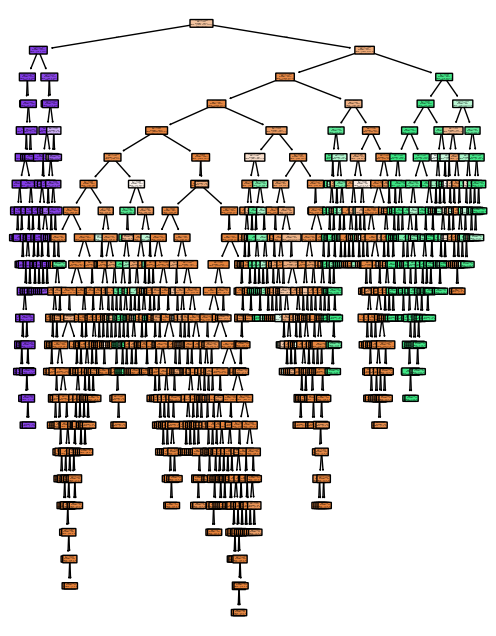

In [ ]:
plt.figure(figsize=(6,8)) #Tamaño de la imagen
plot_tree(model_tree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

- Hacia la izquierda es verdadero y hacia la derecha falso

### **Random Forest**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=120,  max_samples=0.8,
                                criterion='gini', max_depth=None, min_samples_leaf=20)

scores = cross_validate(model_rf, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,15.221993,0.072682,0.967960,0.973979,0.972792,0.977853,0.971530,0.977981,0.964774,0.970342
1,14.061924,0.075830,0.969044,0.974666,0.973852,0.978481,0.974702,0.978380,0.963982,0.971247
2,13.879366,0.072658,0.971794,0.973891,0.976144,0.977775,0.977440,0.977617,0.966751,0.970499
3,14.940179,0.092817,0.971983,0.974042,0.976144,0.977951,0.975335,0.978115,0.968920,0.970328
4,14.252400,0.072643,0.973974,0.973799,0.977735,0.977716,0.975415,0.977736,0.972626,0.970220
5,14.216286,0.076672,0.973145,0.974383,0.977204,0.978285,0.977807,0.978600,0.968902,0.970514
6,14.492620,0.074147,0.970822,0.974798,0.975084,0.978639,0.973831,0.978952,0.968112,0.970976
7,14.253541,0.073117,0.966120,0.973828,0.971196,0.977677,0.969586,0.977200,0.962951,0.970772
8,14.701898,0.076150,0.974471,0.973556,0.978088,0.977539,0.977952,0.977620,0.971367,0.969854
9,13.995052,0.080283,0.971129,0.973459,0.975437,0.977421,0.974655,0.977439,0.967901,0.969846


In [ ]:
scores.mean()

,0
fit_time,14.401526
score_time,0.076700
test_f1_macro,0.971044
train_f1_macro,0.974040
test_accuracy,0.975368
train_accuracy,0.977934
test_precision_macro,0.974825
train_precision_macro,0.977964
test_recall_macro,0.967629
train_recall_macro,0.970460


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['RandomForest']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest
0,0.969078,0.967960
1,0.967863,0.969044
2,0.971725,0.971794
3,0.968754,0.971983
4,0.971308,0.973974
5,0.974110,0.973145
6,0.969566,0.970822
7,0.966756,0.966120
8,0.972801,0.974471
9,0.973022,0.971129


### **KNN**
* Primero hay que hacer *Normalización*

####Normalización

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
var_numericas = ['u', 'g', 'r', 'i', 'z', 'redshift']

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[var_numericas]) #Ajuste de los parametros sobre 100% de los datos (data): max - min

#Se aplica la normalización a 70%  y 30%
X_train[var_numericas]= min_max_scaler.transform(X_train[var_numericas]) #70%
X_test[var_numericas]= min_max_scaler.transform(X_test[var_numericas]) #30%
X_train.head()

,u,g,r,i,z,redshift
33444,0.381887,0.394323,0.418582,0.409304,0.419374,0.001397
34288,0.481745,0.492034,0.517639,0.502731,0.516666,0.001378
22422,0.508081,0.551424,0.621402,0.592839,0.652542,0.014193
57898,0.314850,0.319403,0.338210,0.329992,0.335442,0.001432
38803,0.560821,0.511882,0.477550,0.429273,0.420254,0.001421


####Modelo Knn

In [ ]:
#Método Perezoso
from sklearn.neighbors  import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.054432,0.075713,0.944185,0.973672,0.951237,0.977362,0.957042,0.987533,0.932762,0.961353
1,0.048852,0.076258,0.938993,0.974816,0.947173,0.978304,0.954292,0.988052,0.925671,0.962988
2,0.048702,0.073687,0.946897,0.973761,0.953349,0.977402,0.959087,0.987665,0.936178,0.961412
3,0.048896,0.075932,0.941446,0.974540,0.948401,0.978069,0.953073,0.987902,0.931159,0.962607
4,0.048515,0.075729,0.947214,0.974236,0.953349,0.977814,0.954765,0.987824,0.940265,0.962134
5,0.050507,0.073354,0.946270,0.974022,0.952819,0.977657,0.958778,0.987659,0.935140,0.961876
6,0.058972,0.080162,0.947974,0.974357,0.954409,0.977932,0.958783,0.987857,0.938387,0.962325
7,0.053589,0.074623,0.942201,0.974244,0.949638,0.977755,0.952594,0.987822,0.932942,0.962125
8,0.047893,0.072715,0.947389,0.973578,0.953702,0.977264,0.957217,0.987539,0.938530,0.961182
9,0.084212,0.131549,0.944869,0.973583,0.951758,0.977304,0.956296,0.987392,0.934710,0.961295


In [ ]:
scores.mean()

,0
fit_time,0.054457
score_time,0.080972
test_f1_macro,0.944744
train_f1_macro,0.974081
test_accuracy,0.951583
train_accuracy,0.977686
test_precision_macro,0.956193
train_precision_macro,0.987724
test_recall_macro,0.934574
train_recall_macro,0.961930


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn
0,0.969078,0.967960,0.944185
1,0.967863,0.969044,0.938993
2,0.971725,0.971794,0.946897
3,0.968754,0.971983,0.941446
4,0.971308,0.973974,0.947214
5,0.974110,0.973145,0.946270
6,0.969566,0.970822,0.947974
7,0.966756,0.966120,0.942201
8,0.972801,0.974471,0.947389
9,0.973022,0.971129,0.944869


### **Red Neuronal**
- Primero hay que *Normalizar*

In [ ]:
#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(10,), learning_rate='adaptive',
                     learning_rate_init=0.02, momentum= 0.2, max_iter=500, verbose=False)

scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,2.978355,0.009467,0.952324,0.950517,0.959011,0.957100,0.951490,0.947474,0.953367,0.953730
1,5.109745,0.009860,0.945597,0.949720,0.954770,0.957453,0.962206,0.961869,0.934287,0.941337
2,4.563155,0.009390,0.962059,0.963879,0.967309,0.968763,0.965365,0.965636,0.959257,0.962308
3,5.779056,0.012235,0.958885,0.960921,0.965011,0.966937,0.964899,0.969311,0.954040,0.954223
4,5.492992,0.009966,0.961415,0.960782,0.966425,0.966230,0.960272,0.962836,0.962852,0.959310
5,7.601285,0.011525,0.966095,0.960507,0.971550,0.966682,0.976479,0.969986,0.957685,0.952964
6,5.747885,0.011887,0.961782,0.961535,0.966955,0.966996,0.963334,0.964319,0.960762,0.959241
7,7.969022,0.012276,0.953549,0.954620,0.961477,0.962127,0.968260,0.968432,0.942528,0.944245
8,9.037129,0.011758,0.963567,0.962002,0.968546,0.967349,0.964285,0.963659,0.963139,0.960724
9,7.497574,0.011414,0.962849,0.960248,0.968369,0.966230,0.968547,0.966922,0.958114,0.954844


In [ ]:
scores.mean()

,0
fit_time,6.177620
score_time,0.010978
test_f1_macro,0.958812
train_f1_macro,0.958473
test_accuracy,0.964942
train_accuracy,0.964587
test_precision_macro,0.964514
train_precision_macro,0.964044
test_recall_macro,0.954603
train_recall_macro,0.954293


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['RedNeuronal']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal
0,0.969078,0.967960,0.944185,0.952324
1,0.967863,0.969044,0.938993,0.945597
2,0.971725,0.971794,0.946897,0.962059
3,0.968754,0.971983,0.941446,0.958885
4,0.971308,0.973974,0.947214,0.961415
5,0.974110,0.973145,0.946270,0.966095
6,0.969566,0.970822,0.947974,0.961782
7,0.966756,0.966120,0.942201,0.953549
8,0.972801,0.974471,0.947389,0.963567
9,0.973022,0.971129,0.944869,0.962849


In [ ]:
model_rn.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10,), learning_rate='adaptive',
              learning_rate_init=0.02, max_iter=500, momentum=0.2)

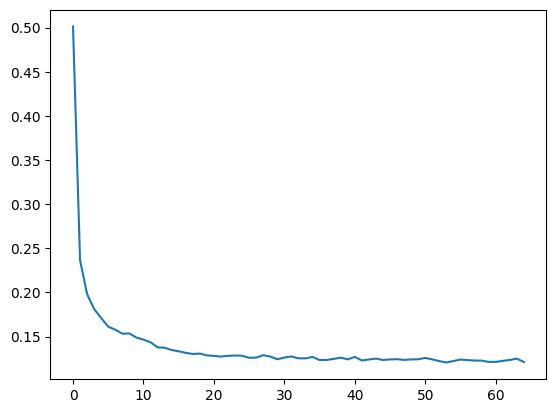

In [ ]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = model_rn.loss_curve_
plt.plot(loss_values)

- Si la gráfica de perdida empieza a subir, significa que hay sobrentrenamiento (Overfitting)

##Modelos de ensamble

###XGBoost

In [ ]:
#XGBoost
import xgboost as xgb
model_xgb = xgb.XGBClassifier(
    max_depth=20, learning_rate=0.1, n_estimators=100, subsample=0.8)

scores = cross_validate(model_xgb, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,4.706643,0.082330,0.972007,0.999687,0.976148,0.999725,0.974768,0.999716,0.969409,0.999659
1,2.987460,0.079763,0.969055,0.999598,0.973675,0.999647,0.974618,0.999672,0.963957,0.999523
2,3.089941,0.081577,0.972925,0.999625,0.976851,0.999666,0.977958,0.999601,0.968346,0.999650
3,4.341677,0.078631,0.972955,0.999641,0.976851,0.999686,0.976182,0.999718,0.969864,0.999565
4,3.025586,0.079251,0.973244,0.999736,0.976851,0.999764,0.973644,0.999743,0.972859,0.999729
5,2.970895,0.079583,0.971582,0.999646,0.975614,0.999686,0.975583,0.999655,0.967824,0.999637
6,4.528896,0.079846,0.969353,0.999697,0.973670,0.999725,0.972811,0.999662,0.966181,0.999731
7,3.108917,0.081523,0.969302,0.999607,0.973847,0.999647,0.974225,0.999619,0.964762,0.999595
8,2.861210,0.078912,0.976053,0.999708,0.979502,0.999745,0.979559,0.999747,0.972754,0.999670
9,4.498886,0.083153,0.971002,0.999584,0.975084,0.999627,0.974682,0.999540,0.967507,0.999628


In [ ]:
scores.mean()

,0
fit_time,3.612011
score_time,0.080457
test_f1_macro,0.971748
train_f1_macro,0.999653
test_accuracy,0.975809
train_accuracy,0.999692
test_precision_macro,0.975403
train_precision_macro,0.999667
test_recall_macro,0.968346
train_recall_macro,0.999639


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['XGBoost']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,XGBoost
0,0.969078,0.967960,0.944185,0.952324,0.972007
1,0.967863,0.969044,0.938993,0.945597,0.969055
2,0.971725,0.971794,0.946897,0.962059,0.972925
3,0.968754,0.971983,0.941446,0.958885,0.972955
4,0.971308,0.973974,0.947214,0.961415,0.973244
5,0.974110,0.973145,0.946270,0.966095,0.971582
6,0.969566,0.970822,0.947974,0.961782,0.969353
7,0.966756,0.966120,0.942201,0.953549,0.969302
8,0.972801,0.974471,0.947389,0.963567,0.976053
9,0.973022,0.971129,0.944869,0.962849,0.971002


###Voting hard

In [ ]:
#Votación hard: todos los modelos tiene el mismo peso
from sklearn.ensemble import VotingClassifier
clasificadores= [('knn', model_knn), ('net', model_rn), ('rf', model_rf)]
model_vot_hard = VotingClassifier(estimators=clasificadores, voting='hard')

scores = cross_validate(model_vot_hard, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,19.398949,0.252392,0.966350,0.974044,0.971555,0.978010,0.972363,0.979944,0.961227,0.968797
1,22.101763,0.249831,0.966258,0.974517,0.971555,0.978520,0.974617,0.981029,0.959278,0.968716
2,19.612380,0.171119,0.969374,0.975046,0.973670,0.978855,0.973404,0.979472,0.966023,0.970985
3,21.583726,0.181554,0.968013,0.974693,0.972610,0.978580,0.971255,0.980040,0.965215,0.969858
4,22.902674,0.166408,0.969645,0.973212,0.974024,0.977264,0.972806,0.978840,0.966871,0.968254
5,21.165125,0.175065,0.970476,0.973689,0.974731,0.977657,0.975150,0.978663,0.966439,0.969223
6,19.818800,0.170766,0.967168,0.974833,0.971726,0.978756,0.970450,0.980573,0.964506,0.969639
7,18.898094,0.167929,0.964291,0.975373,0.969606,0.979129,0.968396,0.980328,0.960763,0.970888
8,24.506880,0.239149,0.970161,0.973749,0.974200,0.977814,0.974148,0.979712,0.966859,0.968438
9,19.147067,0.172655,0.968434,0.975143,0.972963,0.978953,0.971637,0.980140,0.965655,0.970603


In [ ]:
scores.mean()

,0
fit_time,20.913546
score_time,0.194687
test_f1_macro,0.968017
train_f1_macro,0.974430
test_accuracy,0.972664
train_accuracy,0.978354
test_precision_macro,0.972423
train_precision_macro,0.979874
test_recall_macro,0.964284
train_recall_macro,0.969540


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['VotingHard']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,XGBoost,VotingHard
0,0.969078,0.967960,0.944185,0.952324,0.972007,0.966350
1,0.967863,0.969044,0.938993,0.945597,0.969055,0.966258
2,0.971725,0.971794,0.946897,0.962059,0.972925,0.969374
3,0.968754,0.971983,0.941446,0.958885,0.972955,0.968013
4,0.971308,0.973974,0.947214,0.961415,0.973244,0.969645
5,0.974110,0.973145,0.946270,0.966095,0.971582,0.970476
6,0.969566,0.970822,0.947974,0.961782,0.969353,0.967168
7,0.966756,0.966120,0.942201,0.953549,0.969302,0.964291
8,0.972801,0.974471,0.947389,0.963567,0.976053,0.970161
9,0.973022,0.971129,0.944869,0.962849,0.971002,0.968434


###Bagging

In [ ]:
#Bagging: Knn
from sklearn.ensemble import BaggingClassifier
modelo_base=KNeighborsClassifier(n_neighbors=1, metric='euclidean')

model_bag = BaggingClassifier(modelo_base, n_estimators=100, max_samples=0.7)

scores = cross_validate(model_bag, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,3.460579,5.895484,0.950156,0.989433,0.956007,0.990693,0.949984,0.990273,0.950450,0.988677
1,4.201540,5.328813,0.946930,0.990230,0.953534,0.991361,0.949704,0.990370,0.944473,0.990148
2,3.449882,5.048884,0.953243,0.990115,0.958650,0.991283,0.952676,0.990762,0.954222,0.989530
3,3.544063,6.019120,0.945938,0.990278,0.951935,0.991479,0.944264,0.990841,0.947776,0.989786
4,4.366047,5.095510,0.950345,0.990198,0.955646,0.991400,0.948141,0.990900,0.952797,0.989568
5,3.605577,5.011651,0.952916,0.990594,0.958297,0.991734,0.952951,0.991052,0.953015,0.990191
6,3.526967,5.900658,0.949290,0.990172,0.955116,0.991342,0.948929,0.990627,0.949849,0.989787
7,3.719568,5.601116,0.946804,0.989900,0.953349,0.991086,0.946176,0.990361,0.947705,0.989498
8,4.163810,4.986577,0.954702,0.990915,0.959887,0.991989,0.952228,0.991377,0.957397,0.990507
9,3.492214,5.594745,0.951292,0.990280,0.956706,0.991420,0.949496,0.990578,0.953280,0.990045


In [ ]:
scores.mean()

,0
fit_time,3.753025
score_time,5.448256
test_f1_macro,0.950162
train_f1_macro,0.990211
test_accuracy,0.955913
train_accuracy,0.991379
test_precision_macro,0.949455
train_precision_macro,0.990714
test_recall_macro,0.951097
train_recall_macro,0.989774


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Bagging']=scores['test_f1_macro']
comparacion_CV

,Tree,RandomForest,Knn,RedNeuronal,XGBoost,VotingHard,Bagging
0,0.969078,0.967960,0.944185,0.952324,0.972007,0.966350,0.950156
1,0.967863,0.969044,0.938993,0.945597,0.969055,0.966258,0.946930
2,0.971725,0.971794,0.946897,0.962059,0.972925,0.969374,0.953243
3,0.968754,0.971983,0.941446,0.958885,0.972955,0.968013,0.945938
4,0.971308,0.973974,0.947214,0.961415,0.973244,0.969645,0.950345
5,0.974110,0.973145,0.946270,0.966095,0.971582,0.970476,0.952916
6,0.969566,0.970822,0.947974,0.961782,0.969353,0.967168,0.949290
7,0.966756,0.966120,0.942201,0.953549,0.969302,0.964291,0.946804
8,0.972801,0.974471,0.947389,0.963567,0.976053,0.970161,0.954702
9,0.973022,0.971129,0.944869,0.962849,0.971002,0.968434,0.951292


#Comparación de modelos del 70% de los datos

<Axes: >

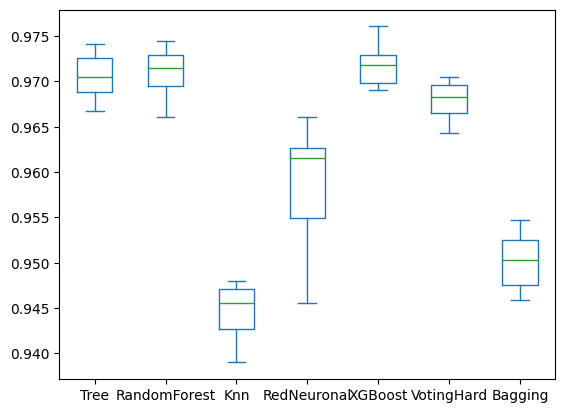

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

- Los 3 mejores modelos son: Arbol, RandomForest y XGBoost.
- Aunque se puede ver que todos los modelos están arriba de 0,9 y no hay mucha diferencia por lo que se podría utilizar cualquiera de los modelos

#Hiperparametrización

##GridSearch

In [ ]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

<Axes: xlabel='class'>

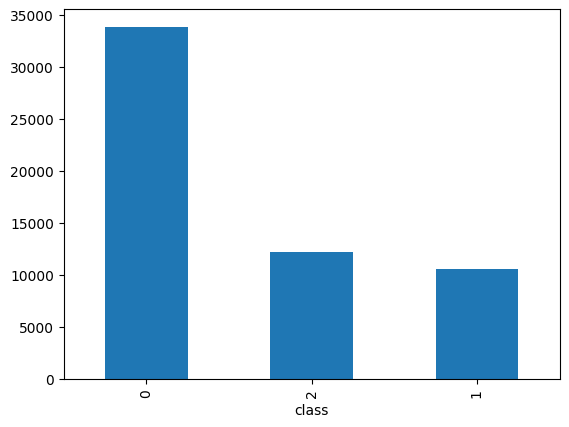

In [ ]:
#División 70-30
X = data.drop("class", axis = 1) # Variables predictoras
Y = data['class'] #Variable objetivo
# Se pone estratificado en Clasificación.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

###Arbol

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100,200,300] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

In [ ]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=model_tree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
#n_jobs es para paralelizar
#cv es validación cruzada
grid.fit(X_train, Y_train) #70%

#Mejor modelo
model_tree= grid.best_estimator_

medidas['GridSearch_Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
medidas

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 50}


,GridSearch_Tree
f1 de la CV,0.969591


###XGBoost

In [ ]:
#  XGBoost
import xgboost as xgb
model_xgb = xgb.XGBClassifier()

# Definir los hiperparametros
learning_rate=[0.1,0.2] # Corrección en cada iteración
subsample=[0.8, 0.9] # Tamaño de subconjuntos
n_estimators=[50,100,200] # Cantidad arboles
max_depth=[None, 10,50,100] #Niveles de profundidad

In [ ]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, subsample=subsample, learning_rate=learning_rate)
grid = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
#n_jobs es para paralelizar
#cv es validación cruzada
grid.fit(X_train, Y_train) #70%

#Mejor modelo
model_xgb= grid.best_estimator_

medidas['GridSearch_XGBoost']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
medidas

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.9}


,GridSearch_Tree,GridSearch_XGBoost
f1 de la CV,0.969591,0.97238


###RandomForest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

# Hiperparámetros para buscar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 50],
    'min_samples_leaf': [10,50],
    'max_samples':[0.7, 0.8],
}

grid = GridSearchCV(model_rf, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
model_rf= grid.best_estimator_

medidas['GridSearch_RandomForest']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
medidas
#Mejor Modelo
grid_best_model = grid.best_estimator_
best_params = grid.best_params_
print(best_params)

{'max_depth': None, 'max_samples': 0.8, 'min_samples_leaf': 10, 'n_estimators': 100}
{'max_depth': None, 'max_samples': 0.8, 'min_samples_leaf': 10, 'n_estimators': 100}


In [ ]:
medidas

,GridSearch_Tree,GridSearch_XGBoost,GridSearch_RandomForest
f1 de la CV,0.969591,0.97238,0.972289


##Algoritmos genéticos

###Instalación

In [ ]:
!pip install sklearn-genetic-opt

In [ ]:
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

###Arbol

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

# Definir los hiperparámetros
param_grid = {
    'criterion': Categorical(['entropy', 'gini']),
    'max_depth': Integer(20, 200),
    'min_samples_leaf': Integer(2, 100)
}

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

evolved_estimator = GASearchCV(
    estimator=model_tree,
    cv=3, #10
    scoring='f1_macro',
    population_size=20, #tamaño de la población es constante
    generations=35, #generaciones o iteraciones
    elitism=True, #selección de padres
    crossover_probability=0.4, #porcentaje para hacer recombinación
    mutation_probability=0.6, #porcentaje de mutación
    param_grid=param_grid,
    criteria='max',
    verbose=True)

In [ ]:
#Aprendizaje
evolved_estimator.fit(X_train,Y_train) #70%

#Mejor modelo
best_params= evolved_estimator.best_params_
model_tree_genetics= evolved_estimator.best_estimator_
print(best_params)

medidas['Genetics_Tree']=evolved_estimator.best_score_
medidas

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.967306	0.00189261 	0.969567   	0.960126   
1  	40    	0.968559	0.000823662	0.969913   	0.967089   
2  	40    	0.969392	0.000513434	0.969913   	0.967643   
3  	40    	0.96966 	0.000195778	0.969913   	0.969202   
4  	40    	0.969849	9.05343e-05	0.969913   	0.969567   
5  	40    	0.969771	0.000503163	0.969913   	0.967589   
6  	40    	0.969907	2.86305e-05	0.969913   	0.969782   
7  	40    	0.969913	2.22045e-16	0.969913   	0.969913   
8  	40    	0.969817	0.000417442	0.969913   	0.967998   
9  	40    	0.969865	0.000212348	0.969913   	0.968939   
10 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
11 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
12 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
13 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
14 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
15 	40    	0.969913	2.22045e-16	0.969913   	0.969913   
16 	40    	0.969918	2.24002e-05	0.970016   	0.96

,Genetics_Tree
f1 de la CV,0.970102


###RandomForest

In [ ]:
#  Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

# Definir los hiperparametros
param_grid = {
    'n_estimators': Integer(50,150),
    'criterion': Categorical(['entropy', 'gini']),
    'min_samples_leaf': Integer(2, 100),
    'max_samples': Continuous(0.8, 0.9)
}

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

evolved_estimator = GASearchCV(
    estimator=model_rf,
    cv=3, #10
    scoring='f1_macro',
    population_size=20, #tamaño de la población es constante
    generations=10, #generaciones o iteraciones
    elitism=True, #selección de padres
    crossover_probability=0.4, #porcentaje para hacer recombinación
    mutation_probability=0.6, #porcentaje de mutación
    param_grid=param_grid,
    criteria='max',
    verbose=True)

In [ ]:
#Aprendizaje
evolved_estimator.fit(X_train,Y_train) #70%

#Mejor modelo
best_params= evolved_estimator.best_params_
model_rf_genetics= evolved_estimator.best_estimator_
print(best_params)

medidas['Genetics_RandomForest']=evolved_estimator.best_score_
medidas

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.967127	0.00289378 	0.972093   	0.962863   
1  	40    	0.968367	0.00243049 	0.972352   	0.964073   
2  	40    	0.970972	0.0013011  	0.972352   	0.967615   
3  	40    	0.971669	0.0012351  	0.972352   	0.966642   
4  	40    	0.972209	0.000184832	0.972361   	0.97177    
5  	40    	0.972349	4.88456e-05	0.972516   	0.972255   
6  	40    	0.972357	7.12949e-05	0.972565   	0.972233   
7  	40    	0.97247 	0.000107355	0.972565   	0.972255   
8  	40    	0.972506	9.31113e-05	0.972565   	0.972342   
9  	40    	0.972472	0.00019301 	0.972565   	0.971756   
10 	40    	0.972542	6.85673e-05	0.972565   	0.972315   
11 	40    	0.972555	4.44361e-05	0.972565   	0.972361   
12 	40    	0.972567	8.58996e-06	0.972605   	0.972565   
13 	40    	0.972539	0.000122922	0.972605   	0.972005   
14 	40    	0.972569	1.1824e-05 	0.972605   	0.972565   
15 	40    	0.972567	8.58996e-06	0.972605   	0.972565   
{'n_estimators': 118, 'criterion': 'entropy', 'm

,Genetics_RandomForest
f1 de la CV,0.972671


###XGBoost

In [ ]:
#  XGBoost
import xgboost as xgb
model_xgb = xgb.XGBClassifier()

# Definir los hiperparámetros
param_grid = {
    'n_estimators': Integer(50,200),
    'learning_rate': Continuous(0.1, 0.5),
    'subsample': Continuous(0.7, 0.9),
}

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

evolved_estimator = GASearchCV(
    estimator=model_xgb,
    cv=3, #10
    scoring='f1_macro',
    population_size=20, #tamaño de la población es constante
    generations=35, #generaciones o iteraciones
    elitism=True, #selección de padres
    crossover_probability=0.4, #porcentaje para hacer recombinación
    mutation_probability=0.6, #porcentaje de mutación
    param_grid=param_grid,
    criteria='max',
    verbose=True)

In [ ]:
#Aprendizaje
evolved_estimator.fit(X_train,Y_train) #70%

#Mejor modelo
best_params= evolved_estimator.best_params_
model_xgb_genetics= evolved_estimator.best_estimator_
print(best_params)

medidas['Genetics_XGBoost']=evolved_estimator.best_score_
medidas

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.968289	0.000419685	0.968928   	0.96742    
1  	40    	0.968719	0.000151426	0.968928   	0.968352   
2  	40    	0.968772	0.000198739	0.968932   	0.968132   
3  	40    	0.968813	0.000129975	0.968928   	0.968441   
4  	40    	0.968874	9.2173e-05 	0.969064   	0.968648   
5  	40    	0.968868	0.000132649	0.96913    	0.968551   
6  	40    	0.968899	0.000123147	0.96913    	0.968579   
7  	40    	0.968973	8.30038e-05	0.96913    	0.968857   
8  	40    	0.968927	9.0017e-05 	0.96913    	0.968707   
9  	40    	0.968986	0.000106817	0.96913    	0.968707   
10 	40    	0.968923	0.000151311	0.96913    	0.968457   
11 	40    	0.968959	9.50452e-05	0.96913    	0.968707   
12 	40    	0.969014	9.40166e-05	0.96913    	0.968839   
13 	40    	0.969083	7.09219e-05	0.96913    	0.968908   
14 	40    	0.969113	4.26713e-05	0.96913    	0.968944   
15 	40    	0.969121	4.06123e-05	0.96913    	0.968944   
16 	40    	0.969125	2.08889e-05	0.96913    	0.96

,Genetics_XGBoost
f1 de la CV,0.969167


#Evaluación con 30%

In [ ]:
from sklearn import metrics

##Arbol

In [ ]:
#Evaluación del Arbol

Y_pred = model_tree_genetics.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()
model_tree_genetics
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(model_tree_genetics,X_test, Y_test)

##RandomForest

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     14502
         QSO       0.96      0.94      0.95      4532
        STAR       0.99      1.00      1.00      5220

    accuracy                           0.98     24254
   macro avg       0.98      0.97      0.98     24254
weighted avg       0.98      0.98      0.98     24254



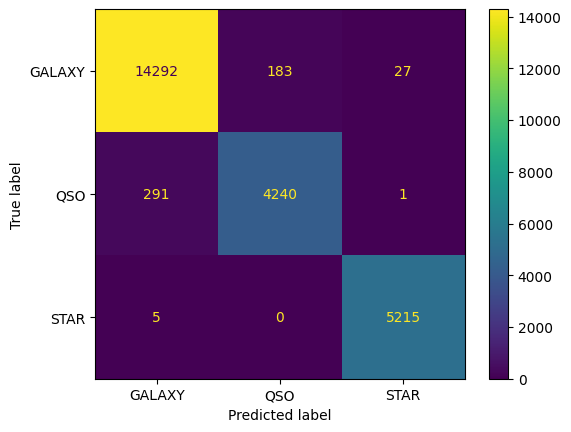

In [ ]:
#Evaluación de Red Neuronal

Y_pred = model_rf_genetics.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(model_rf_genetics,X_test, Y_test)

##XGBoost

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     14502
         QSO       0.96      0.94      0.95      4532
        STAR       0.99      0.99      0.99      5220

    accuracy                           0.98     24254
   macro avg       0.97      0.97      0.97     24254
weighted avg       0.98      0.98      0.98     24254



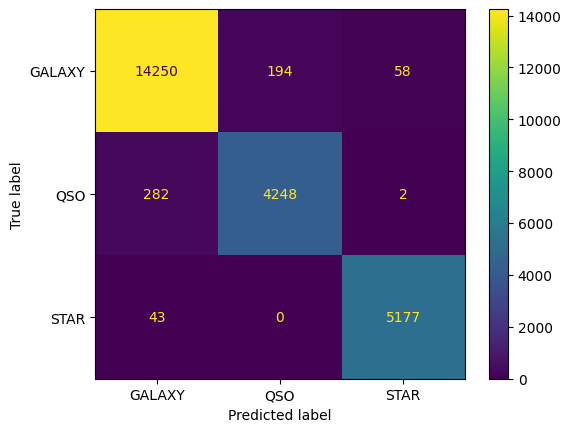

In [ ]:
#Evaluación de Red Neuronal

Y_pred = model_xgb_genetics.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(model_rn,X_test, Y_test)

# 5. Guardamos el modelo

In [ ]:
import pickle
filename = 'modelo.pkl'
variables= X.columns._values
pickle.dump([X_train, Y_train, X_test, Y_test,model_tree, model_rf, model_xgb, labelencoder, variables, min_max_scaler], open(filename, 'wb'))